In [1]:
# libraries
import pandas as pd
import numpy as np
from pymongo import MongoClient

## Data import

In [21]:
#read data in csv format
git = pd.read_csv('gitData.csv')
issues = pd.read_csv('gitIssues.csv')

In [ ]:
# create a new column of project types for gitData, which contains only pytorch and tensorflow 
regx = r'({})'.format('|'.join(['pytorch', 'audio', 'text', 'vision', 'serve', 'torchrec','elastic', 'xla']))
git['project_type'] = git['project_name'].str.replace(regx, "pytorch").fillna(git['project_name'])

In [ ]:
#data inspection
print(git.info())
print(issues.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60996 entries, 0 to 60995
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          60996 non-null  int64  
 1   hash                60996 non-null  object 
 2   msg                 60996 non-null  object 
 3   author_name         60996 non-null  object 
 4   committer_name      60996 non-null  object 
 5   author_date         60996 non-null  object 
 6   author_timezone     60996 non-null  int64  
 7   committer_date      60996 non-null  object 
 8   committer_timezone  60996 non-null  int64  
 9   branches            60996 non-null  object 
 10  in_main_branch      60996 non-null  bool   
 11  merge               60996 non-null  bool   
 12  parents             60996 non-null  object 
 13  project_name        60996 non-null  object 
 14  deletions           60996 non-null  int64  
 15  insertions          60996 non-null  int64  
 16  line

In [ ]:
# let's connect to the localhost
client = MongoClient()

# let's create a database 
db = client.github

# collection for git issues
gitIssues = db.gitIssues

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, gitIssues), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'gitIssues')



In [ ]:
%%time 
##
# slow loading of data
d_gitissue = {}
# pass data 
for i in issues.index:
    d_gitissue = {
        "Questions": {
            "Title": issues.loc[i,"title"],
            "Body": issues.loc[i,"body"]
        },
        "User" : {
            "Username" : issues.loc[i, "user"],
            "User_ID" :  issues.loc[i,"user_id"]
        },
        "State" : {
            "State" : issues.loc[i, "state"],
            "Created_at" :  issues.loc[i,"created_at"],
            "Updated_at" :  issues.loc[i,"updated_at"],
            "Closed_at" : issues.loc[i, "closed_at"]
        },
        "Assignees" : issues.loc[i, "assignees"],
        "Closed_by" : issues.loc[i, "closed_by"],
        "Labels" : issues.loc[i, "labels"],
        "Reactions" : issues.loc[i, "reactions"],
        "N_comments" : issues.loc[i, "n_comments"].astype(str),
        "Projects" : issues.loc[i, "project"]
    }
    if issues.loc[i,"title"] == issues.loc[i-1,"title"]:
        continue
    else:
        gitIssues.insert_one(d_gitissue)

CPU times: user 1.4 ms, sys: 211 µs, total: 1.61 ms
Wall time: 3.31 ms


In [ ]:
# new collection for issue comment
IssueComment = db.IssueComment

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, IssueComment), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'IssueComment')



In [ ]:
%%time 
##
# slow loading of data
d_comment = {}
# pass data 
for i in issues.index:
    d_comment = {
        "Title": issues.loc[i,"title"],
        "Comment_id": issues.loc[i,"comment_id"].astype(str),
        "Comment_created_at": issues.loc[i,"comment_created_at"],
        "Comment_updated_at": issues.loc[i, "comment_updated_at"],
        "Comment_user_id": issues.loc[i, "comment_user_id"],
        "Comment_user": issues.loc[i, "comment_user"],
        "Comment_text": issues.loc[i, "comment_text"]
    }
    IssueComment.insert_one(d_comment)

CPU times: user 12.3 s, sys: 1.43 s, total: 13.8 s
Wall time: 20.1 s


In [ ]:
# let's connect to the localhost
client = MongoClient()

# let's create a database 
db = client.github

In [ ]:
# new collection for git data
gitData = db.gitData_new

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, gitData), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'gitData_new')



In [ ]:
# slow loading of data
d_gitcommit = {}
#pass data
for i in git.index:
    d_gitcommit = {
        "Commit": {
            "hash":git.loc[i, "hash"],
            "Msg":{
                "msg":git.loc[i, 'msg'],
                "Author":{
                    "Author_name": git.loc[i, 'author_name'],
                    "Author_date": git.loc[i, 'author_date'],
                    "Author_timezone": git.loc[i, 'author_timezone'].astype(str)
                }
            },
            "Committer":{
                "Committer_name": git.loc[i, 'committer_name'],
                "Committer_date": git.loc[i, 'committer_date'],
                "Committer_timezone": git.loc[i, 'committer_timezone'].astype(str)
            }
        },
        "Branch":{
            "Branches": git.loc[i, 'branches'],
            "In_main_branch": git.loc[i, 'in_main_branch'].astype(str),
            "Merge": git.loc[i, 'merge'].astype(str),
            "Parents":git.loc[i, 'parents']
        },
        "Project_name": {
            "Project_type" : git.loc[i, 'project_type'],
            "Project_name": git.loc[i, 'project_name']
            },
        "File":{
            "Filename": git.loc[i, 'filename'],
            "Change_type": git.loc[i, 'change_type'],
            "Commit_change":{
                "Deletions": git.loc[i, 'deletions'].astype(str),
                "Insertions": git.loc[i, 'insertions'].astype(str),
                "Files": git.loc[i, 'files'].astype(str),
                "Lines":git.loc[i, 'lines'].astype(str)
            }
        },
        "Code_change":{
            "Path":{
                "old_path":git.loc[i, 'old_path'],
                "new_path": git.loc[i, 'new_path']
            },
            "Diff":{
                "Diff": git.loc[i, 'diff'],
                "Diff_parse":{
                    "Diff_parsed":git.loc[i, 'diff_parsed'],
                    "Deleted_lines":git.loc[i, 'deleted_lines'].astype(str)
                }
            },
            "Source_code":{
                "Source_code":git.loc[i, 'source_code'],
                "Source_code_before":git.loc[i, 'source_code_before']
            }
        },
        "Nloc":git.loc[i, 'nloc'],
        "Complexity":git.loc[i, 'complexity'],
        "Token_count":git.loc[i, 'token_count']
        
     }
    gitData.insert_one(d_gitcommit)

## Data Cleansing

In [2]:
# let's connect to the localhost
client = MongoClient()
# link to the database
db = client.github

# link to the collection
gitData = db.gitData
gitIssues = db.gitIssues
IssueComment = db.IssueComment


In [ ]:
# data cleaning
# clean the NA values into null
# get key names
key_list_issue = []
for i in d_gitissue.keys():
    try:
        for b in d_gitissue.get(str(i)).keys():
            key_list_issue.append(str(i) + '.' + str(b))
    except:
        key_list_issue.append(i)

In [ ]:
# get key names
key_list_comment = []
for i in d_comment.keys():
    try:
        for b in d_comment.get(str(i)).keys():
            key_list_comment.append(str(i) + '.' + str(b))
    except:
        key_list_comment.append(i)

In [ ]:
# get key names
key_list_commit = []
for i in d_gitcommit.keys():
    try:
        for b in d_gitcommit.get(str(i)).keys():
            key_list_commit.append(str(i) + '.' + str(b))
    except:
        key_list_commit.append(i)

In [ ]:
# unset NaN fields
for i in key_list_issue:
    update = gitIssues.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)

In [ ]:
# unset NaN fields
for i in key_list_comment:
    update = IssueComment.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)


    Key: Title
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_id
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_created_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_updated_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_user_id
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_user
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_text
    Matched: 0
    Modified: 0
    ------------
    

    Key: _id
    Matched: 0
    Modified: 0
    ------------
    


In [ ]:
# unset NaN fields
for i in key_list_commit:
    update = gitData.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)

In [ ]:
# update the date date from string to datetime
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Created_at": {
            "$toDate":"$State.Created_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Created_at", update.matched_count, update.modified_count), flush=True)


    Key: Created_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [ ]:
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Updated_at": {
            "$toDate":"$State.Updated_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Updated_at", update.matched_count, update.modified_count), flush=True)


    Key: Updated_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [ ]:
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Closed_at": {
            "$toDate":"$State.Closed_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Closed_at", update.matched_count, update.modified_count), flush=True)


    Key: Closed_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [3]:
# change the data type of 'Author_date', 'Committer_date' in gitData
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Msg.Author.Author_date": {
            "$toDate":"$Commit.Msg.Author.Author_date" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Msg.Author.Author_date", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Msg.Author.Author_date
    Matched: 60996
    Modified: 60996
    ------------
    


In [4]:
# change the data type of 'Author_date', 'Committer_date' in gitData
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Committer.Committer_date": {
            "$toDate":"$Commit.Committer.Committer_date" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Committer.Committer_date", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Committer.Committer_date
    Matched: 60996
    Modified: 60996
    ------------
    


In [ ]:
# change the data type of 'Comment_created_at' in issueComment
update = IssueComment.update_many(
    {},
    [{"$set": {
        "Comment_created_at": {
            "$toDate":"$Comment_created_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Comment_created_at", update.matched_count, update.modified_count), flush=True)


    Key: Comment_created_at
    Matched: 32329
    Modified: 32329
    ------------
    


In [ ]:
# change the data type of 'Comment_updated_at' in issueComment
update = IssueComment.update_many(
    {},
    [{"$set": {
        "Comment_updated_at": {
            "$toDate":"$Comment_updated_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Comment_updated_at", update.matched_count, update.modified_count), flush=True)


    Key: Comment_updated_at
    Matched: 32329
    Modified: 32329
    ------------
    


In [ ]:
# update numeric data from string to int
# change the data type of "N_comments" in gitIssues into integer
update = gitIssues.update_many(
    {},
    [{"$set": {
        "N_comments": {
            "$toInt":"$N_comments" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("N_comments", update.matched_count, update.modified_count), flush=True)


    Key: N_comments
    Matched: 5513
    Modified: 5513
    ------------
    


In [ ]:
# change the data type of "Author_timezone" in gitData into integer
update = IssueComment.update_many(
    {},
    [{"$set": {
        "N_comments": {
            "$toInt":"$N_comments" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Author_timezone", update.matched_count, update.modified_count), flush=True)


    Key: Author_timezone
    Matched: 32329
    Modified: 32329
    ------------
    


In [5]:
# change the data type of "Author_timezone" in gitData into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Msg.Author.Author_timezone": {
            "$toInt":"$Commit.Msg.Author.Author_timezone" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Author_timezone", update.matched_count, update.modified_count), flush=True)


    Key: Author_timezone
    Matched: 60996
    Modified: 60996
    ------------
    


In [6]:
# change the data type of "Author_timezone" in gitData into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Committer.Committer_timezone": {
            "$toInt":"$Commit.Committer.Committer_timezone" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Committer.Committer_timezone", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Committer.Committer_timezone
    Matched: 60996
    Modified: 60996
    ------------
    


In [7]:
# change the data type of "Deletions" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Deletions": {
            "$toInt":"$File.Commit_change.Deletions" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Deletions", update.matched_count, update.modified_count), flush=True)


    Key: Deletions
    Matched: 60996
    Modified: 60996
    ------------
    


In [8]:
# change the data type of "Insertions" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Insertions": {
            "$toInt":"$File.Commit_change.Insertions" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Insertions", update.matched_count, update.modified_count), flush=True)


    Key: Insertions
    Matched: 60996
    Modified: 60996
    ------------
    


In [9]:
# change the data type of "Files" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Files": {
            "$toInt":"$File.Commit_change.Files" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Files", update.matched_count, update.modified_count), flush=True)


    Key: Files
    Matched: 60996
    Modified: 60996
    ------------
    


In [10]:
# change the data type of "Lines" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Lines": {
            "$toInt":"$File.Commit_change.Lines" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Lines", update.matched_count, update.modified_count), flush=True)


    Key: Lines
    Matched: 60996
    Modified: 60996
    ------------
    


In [11]:
# change the data type of "Deleted Lines" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Code_change.Diff.Diff_parse.Deleted_lines": {
            "$toInt":"$Code_change.Diff.Diff_parse.Deleted_lines" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Deleted Lines", update.matched_count, update.modified_count), flush=True)


    Key: Deleted Lines
    Matched: 60996
    Modified: 60996
    ------------
    


In [ ]:
#!pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)


## Part3. Advanced analysis via pyspark

### 3.1 GitIssue dataset

In [ ]:
import findspark
findspark.init()
findspark.add_packages(r"org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")

In [ ]:
### connect to spark
from pyspark.sql import SparkSession
# Session with Mongo
spark_mongo = SparkSession \
    .builder \
    .appName("gitIssues") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/github.gitIssues") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/github.gitIssues") \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.1') \
    .getOrCreate()

22/07/21 11:18:59 WARN Utils: Your hostname, ashubuntu resolves to a loopback address: 127.0.1.1; using 10.210.38.115 instead (on interface wlp2s0)
22/07/21 11:18:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /home/ash/.ivy2/cache
The jars for the packages stored in: /home/ash/.ivy2/jars
:: loading settings :: url = jar:file:/home/ash/miniconda3/envs/dms/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-41cd6892-07b6-4cf5-b89d-bc1ae6fbb510;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 280ms :: artifacts dl 15ms
	:: modules in u

In [89]:
# load data from MongoDB
df_issue = spark_mongo.read.format("mongo").load()

df_issue.printSchema()

root
 |-- Assignees: string (nullable = true)
 |-- Closed_by: string (nullable = true)
 |-- Labels: string (nullable = true)
 |-- N_comments: integer (nullable = true)
 |-- Projects: string (nullable = true)
 |-- Questions: struct (nullable = true)
 |    |-- Body: string (nullable = true)
 |    |-- Title: string (nullable = true)
 |-- Reactions: string (nullable = true)
 |-- State: struct (nullable = true)
 |    |-- State: string (nullable = true)
 |    |-- Created_at: timestamp (nullable = true)
 |    |-- Updated_at: timestamp (nullable = true)
 |    |-- Closed_at: timestamp (nullable = true)
 |-- User: struct (nullable = true)
 |    |-- Username: string (nullable = true)
 |    |-- User_ID: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



#### 3.1.1 Word2Vec

In [76]:
# word2vec
# libraries
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import Word2Vec
from pyspark.sql.functions import format_number as fmt

In [90]:
#### tensorflow
# Tokenize text
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="Labels", toLowercase=True, pattern="\\W")
df_tf=tokenizer.transform(df_issue[df_issue.Projects=="tensorflow"])

In [91]:
# Tokenize text
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="Labels", toLowercase=True, pattern="\\W")
df_torch=tokenizer.transform(df_issue[df_issue.Projects=="pytorch"])

In [93]:
%%time
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_tf = word2Vec.fit(df_tf)

CPU times: user 6.59 ms, sys: 12 ms, total: 18.6 ms
Wall time: 4.26 s


In [94]:
%%time
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_torch = word2Vec.fit(df_torch)

CPU times: user 15.2 ms, sys: 4.61 ms, total: 19.8 ms
Wall time: 736 ms


In [95]:
# let's see the vectors
model_tf.getVectors().show()

+--------+--------------------+
|    word|              vector|
+--------+--------------------+
|      tf|[0.06300431489944...|
|     for|[0.11531545966863...|
|       s|[0.68046706914901...|
| support|[-0.0052388473413...|
|      12|[0.15169315040111...|
|   eager|[-0.1337966620922...|
|  review|[-0.1941734552383...|
|      in|[-0.0653002411127...|
|   bazel|[0.16935804486274...|
|      pi|[0.09820973128080...|
| feature|[-0.0364167243242...|
|   force|[0.47537639737129...|
|examples|[0.10785277187824...|
|    comp|[0.08045279979705...|
|       4|[0.07872554659843...|
|    size|[0.19612309336662...|
|     gpu|[-0.1419175714254...|
|   model|[-0.2405399084091...|
|     yes|[0.14157600700855...|
|      15|[0.13279250264167...|
+--------+--------------------+
only showing top 20 rows



In [96]:
# let's see the vectors
model_torch.getVectors().show()

+-----------+--------------------+
|       word|              vector|
+-----------+--------------------+
|     module|[0.03310500830411...|
|   priority|[-0.0202037487179...|
|     source|[0.03484273329377...|
|    feature|[-0.0090286042541...|
|    request|[0.09472440928220...|
|       onnx|[0.03103079646825...|
|enhancement|[-0.0188134219497...|
|   autograd|[0.00672342954203...|
|       open|[0.03957747668027...|
|       info|[0.05111051350831...|
|     caffe2|[0.01516781840473...|
|   function|[0.08279452472925...|
|         nn|[-0.0107938982546...|
|       todo|[0.04189166054129...|
|      numpy|[0.03403712809085...|
|    triaged|[0.21708764135837...|
|      needs|[0.04883466288447...|
|       high|[-0.0226391293108...|
+-----------+--------------------+



In [102]:
# let's inspect some synonyms
model_tf.findSynonyms("feature", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+-----------+----------+
|       word|similarity|
+-----------+----------+
|        bug|   0.86265|
|    support|   0.72175|
|     others|   0.64756|
|tensorboard|   0.60332|
|performance|   0.56456|
+-----------+----------+



In [103]:
# let's inspect some synonyms
model_torch.findSynonyms("feature", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+--------+----------+
|    word|similarity|
+--------+----------+
|    onnx|   0.49638|
|    high|   0.20241|
|autograd|   0.15242|
|   needs|   0.14324|
|    info|   0.13229|
+--------+----------+



In [113]:
### word2vec for df_issue.questions.body
# Tokenize text
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="Title", toLowercase=True, pattern="\\W")
df_q_tf=tokenizer.transform(df_issue[df_issue.Projects=="tensorflow"].select("Questions.Title"))

In [119]:
### word2vec for df_issue.questions.body
# Tokenize text
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="Title", toLowercase=True, pattern="\\W")
df_q_torch=tokenizer.transform(df_issue[df_issue.Projects=="pytorch"].select("Questions.Title"))

In [115]:
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_tf_q = word2Vec.fit(df_q_tf)

In [120]:
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_q_torch = word2Vec.fit(df_q_torch)

In [121]:
# let's see the vectors
model_tf_q.getVectors().show()

+--------------------+--------------------+
|                word|              vector|
+--------------------+--------------------+
|              breaks|[-0.1416938602924...|
|                rate|[0.32064399123191...|
|              assert|[0.13234850764274...|
|              plugin|[0.15567061305046...|
|               alpha|[-0.1566996425390...|
|    microcontrollers|[0.13587157428264...|
|              static|[-0.1145319789648...|
|sparsetensordense...|[-0.1010164171457...|
|                used|[0.03540921583771...|
|             allowed|[-0.1055596247315...|
|           reference|[0.39675754308700...|
|                   e|[0.09678275883197...|
|         degradation|[-0.1442326158285...|
|          conversion|[0.10160176455974...|
|              launch|[0.13644599914550...|
|               lists|[0.20603941380977...|
|                 rnn|[-0.0446653552353...|
|           regarding|[0.03897883370518...|
| modulenotfounderror|[-0.0061392369680...|
|              enable|[0.1568355

In [122]:
# let's see the vectors
model_q_torch.getVectors().show()

+----------+--------------------+
|      word|              vector|
+----------+--------------------+
|dataloader|[0.00808050576597...|
|       for|[-0.0075938752852...|
|   support|[5.62367495149374...|
|    module|[0.02303195558488...|
|        in|[0.01268847379833...|
|        is|[0.00978975184261...|
|   feature|[0.01858965493738...|
|   request|[-0.0286420397460...|
|      onnx|[-0.0183246992528...|
|     model|[-0.0125719411298...|
|    tensor|[-0.0187049228698...|
|   pytorch|[-0.0245432853698...|
|      cuda|[-0.0208623651415...|
|         t|[-0.0154734654352...|
|     conda|[-0.0192473139613...|
|        to|[-0.0068821068853...|
|     torch|[0.01539529860019...|
|        on|[-0.0298106689006...|
|     error|[0.00917922426015...|
|       not|[0.01434246171265...|
+----------+--------------------+
only showing top 20 rows



In [123]:
# let's inspect some synonyms
model_tf_q.findSynonyms("breaks", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+---------------+----------+
|           word|similarity|
+---------------+----------+
|    predictions|   0.58062|
|           mode|   0.57265|
|        outputs|   0.56190|
|conv2dtranspose|   0.53947|
|  bidirectional|   0.53055|
+---------------+----------+



In [124]:
# let's inspect some synonyms
model_q_torch.findSynonyms("dataloader", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+-----+----------+
| word|similarity|
+-----+----------+
|torch|   0.64968|
|  not|   0.51748|
|   in|   0.44205|
|   no|   0.37055|
|  the|   0.35213|
+-----+----------+



#### 3.1.2 Network Analysis

In [225]:
# export dataframe to pandas dataframe
df_tf = df_issue[df_issue.Projects=="tensorflow"].select(['Closed_by','User.Username']).toPandas()

In [191]:
df_torch = df_issue[df_issue.Projects=="pytorch"].select(['Closed_by','User.Username']).toPandas()

In [192]:
df_torch.head()

Closed_by         Username
0      Mike Ruberry        hinthornw
1       Gary Miguel    franchenstein
2  Soumith Chintala  sharmalakshay93
3      Mike Ruberry        Grant-Tao
4     Ivan Yashchuk          soumith

In [169]:
# network analysis
import networkx as nx
import matplotlib.pyplot as plt

In [193]:
# check na values
df_torch.isna().sum()

Closed_by    8
Username     0
dtype: int64

In [194]:
# drop na values
df_torch = df_torch.dropna()

In [237]:
G_torch = nx.Graph()
G_torch.add_nodes_from(df_torch["Closed_by"])
G_torch.add_nodes_from(df_torch["Username"])
G_torch.add_edges_from(zip(df_torch["Closed_by"], df_torch["Username"]))

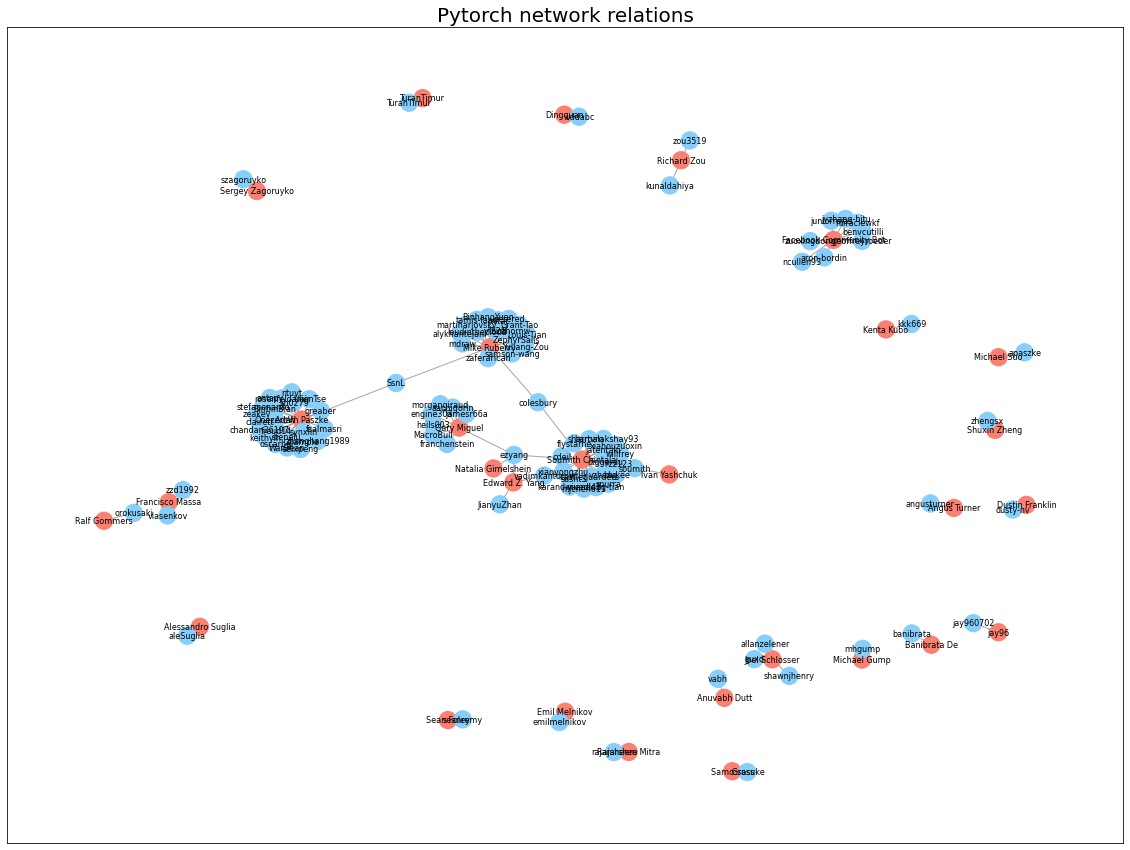

In [223]:
# plot the network
fig = plt.figure(figsize=(20, 15))

# color the node if node is belong to closed_by
def color_node(node):
    if node in df_torch['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

color = [color_node(node) for node in G_torch.nodes]

pos = nx.spring_layout(G_torch)
nc = nx.draw_networkx_nodes(G_torch,
node_color=color,
pos = pos,
node_size=300, #nodesize based on degree
alpha=1,
label = True
)
nx.draw_networkx_edges(G_torch,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_torch, pos = pos, labels ={n: n for n in G_torch}, font_size=8)
# add title
plt.title("Pytorch network relations", fontsize=20)
plt.show()

In [226]:
# check na values
df_tf.isna().sum()

Closed_by    3303
Username        0
dtype: int64

In [227]:
# drop na values
df_tf = df_tf.dropna()

In [236]:
G_tf = nx.Graph()
G_tf.add_nodes_from(df_tf["Closed_by"])
G_tf.add_nodes_from(df_tf["Username"])
G_tf.add_edges_from(zip(df_tf["Closed_by"], df_tf["Username"]))

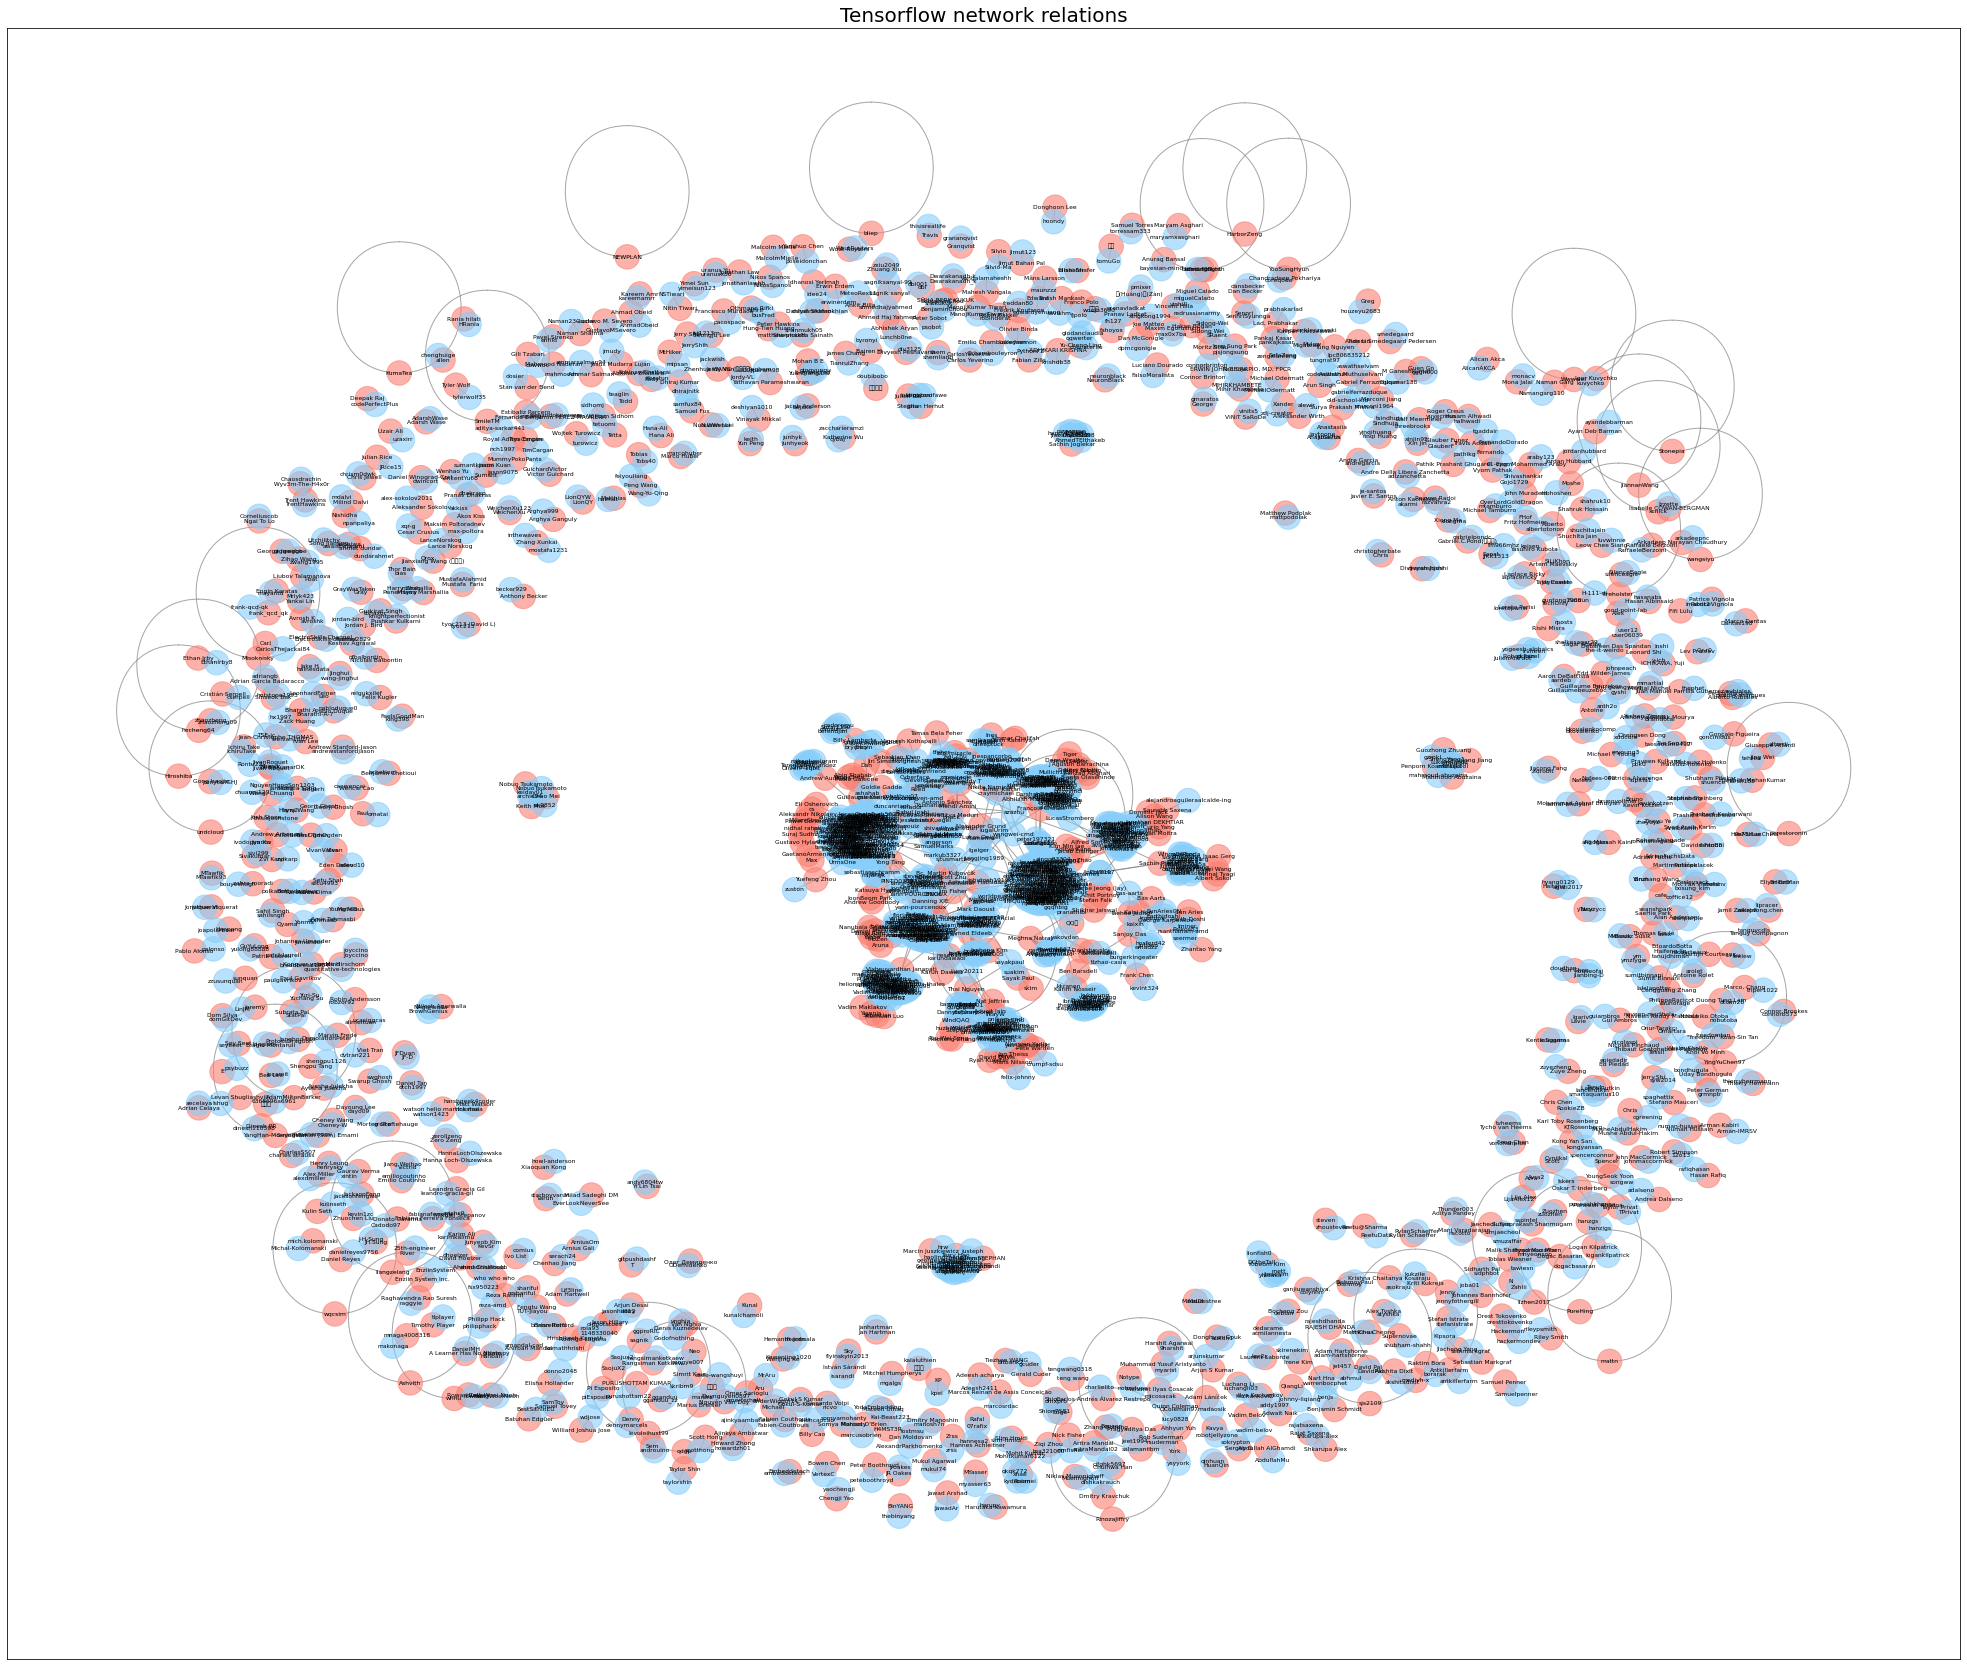

In [235]:
# plot the network
fig = plt.figure(figsize=(35, 30))

# color the node if node is belong to closed_by
def color_node(node):
    if node in df_tf['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

color = [color_node(node) for node in G_tf.nodes]

pos = nx.spring_layout(G_tf)
nc = nx.draw_networkx_nodes(G_tf,
node_color=color,
pos = pos,
node_size=600, #nodesize based on degree
alpha=0.6,
label = True
)
nx.draw_networkx_edges(G_tf,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_tf, pos = pos, labels ={n: n for n in G_tf}, font_size=6)
# add title
plt.title("Tensorflow network relations", fontsize=20)
plt.show()

the average_degree = 1.6641221374045803


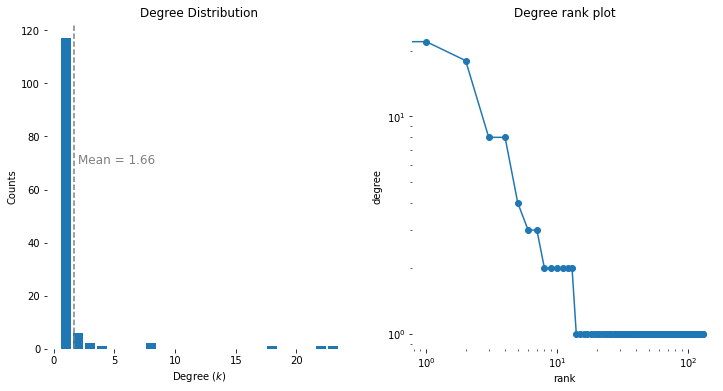

In [240]:
# %% degree distribution
from collections import Counter

l = sorted([d for k,d in G_torch.degree()])
k = Counter(l)
average_degree=np.mean(l)
print('the average_degree =',average_degree)
#  draw the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.bar(k.keys(),[i for i in k.values()])
ax1.axvline(x=average_degree, color='grey', ls='--')
#annotate mean on the graph
ax1.annotate('Mean = 1.66', xy=(2,70),fontsize=12,color='grey')
#set spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#set labels
ax1.set_xlabel('Degree ($k$)')
ax1.set_ylabel('Counts')
#set title
ax1.set_title('Degree Distribution')

# initialize a new figure and plot the data contestually
x = sorted([d for n, d in G_torch.degree()], reverse=True)
ax2.loglog(x, marker="o")
# axes properties
ax2.set_title("Degree rank plot")
ax2.set_ylabel("degree")
ax2.set_xlabel("rank")

# set spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
plt.show()

the average_degree = 1.4568345323741008


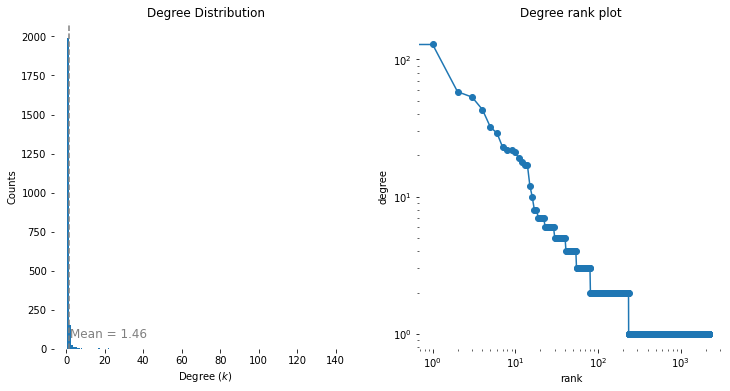

In [241]:
# %% degree distribution

l = sorted([d for k,d in G_tf.degree()])
k = Counter(l)
average_degree=np.mean(l)
print('the average_degree =',average_degree)
#  draw the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.bar(k.keys(),[i for i in k.values()])
ax1.axvline(x=average_degree, color='grey', ls='--')
#annotate mean on the graph
ax1.annotate('Mean = 1.46', xy=(2,70),fontsize=12,color='grey')
#set spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#set labels
ax1.set_xlabel('Degree ($k$)')
ax1.set_ylabel('Counts')
#set title
ax1.set_title('Degree Distribution')

# initialize a new figure and plot the data contestually
x = sorted([d for n, d in G_tf.degree()], reverse=True)
ax2.loglog(x, marker="o")
# axes properties
ax2.set_title("Degree rank plot")
ax2.set_ylabel("degree")
ax2.set_xlabel("rank")

# set spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
plt.show()

array([[<AxesSubplot:xlabel='degree', ylabel='degree'>,
        <AxesSubplot:xlabel='betweenness', ylabel='degree'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='degree'>],
       [<AxesSubplot:xlabel='degree', ylabel='betweenness'>,
        <AxesSubplot:xlabel='betweenness', ylabel='betweenness'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='betweenness'>],
       [<AxesSubplot:xlabel='degree', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='betweenness', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='eigenvector'>]],
      dtype=object)

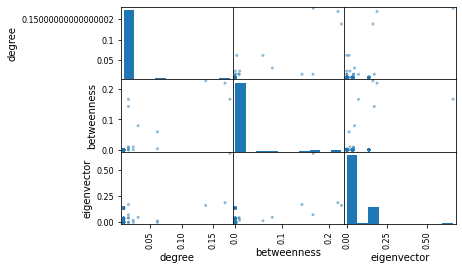

In [252]:
# %% node centrality
#compute centrality measures
import seaborn as sns
from networkx.algorithms import centrality, degree_centrality
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import eigenvector_centrality_numpy
# --> degree centrality
dg = degree_centrality(G_torch)
# --> betweenness centrality
bc = betweenness_centrality(G_torch)
# --> eigenvector centrality
ec = eigenvector_centrality_numpy(G_torch)
df = pd.DataFrame({'degree':dg,'betweenness':bc,'eigenvector':ec})
pd.plotting.scatter_matrix(df)

array([[<AxesSubplot:xlabel='degree', ylabel='degree'>,
        <AxesSubplot:xlabel='betweenness', ylabel='degree'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='degree'>],
       [<AxesSubplot:xlabel='degree', ylabel='betweenness'>,
        <AxesSubplot:xlabel='betweenness', ylabel='betweenness'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='betweenness'>],
       [<AxesSubplot:xlabel='degree', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='betweenness', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='eigenvector'>]],
      dtype=object)

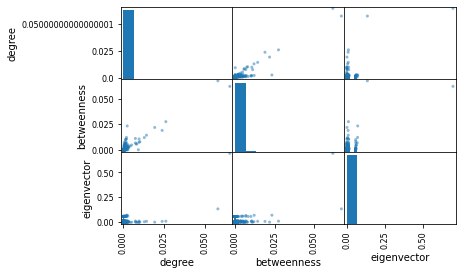

In [248]:
# plot centrality for tensorflow
# --> degree centrality
dg = degree_centrality(G_tf)
# --> betweenness centrality
bc = betweenness_centrality(G_tf)
# --> eigenvector centrality
ec = eigenvector_centrality(G_tf)

df = pd.DataFrame({'degree':dg,'betweenness':bc,'eigenvector':ec})
pd.plotting.scatter_matrix(df)

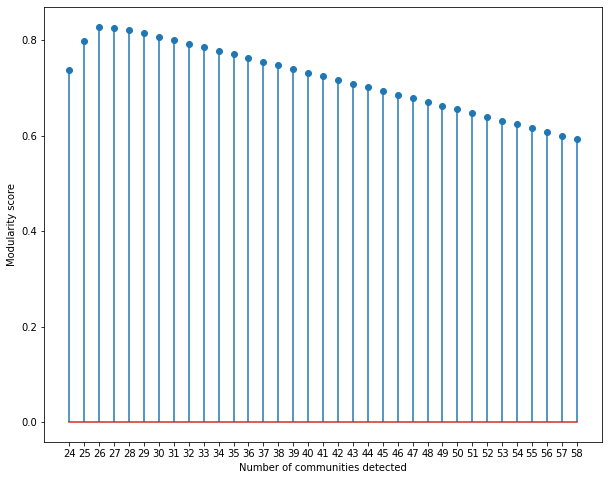

In [253]:
# %% community detection
# use the modularity index to appreciate the quality of alternative
# paritioning solutions
# fit
from networkx.algorithms.community import girvan_newman, modularity
import itertools
solutions = girvan_newman(G_torch)
# get all segmentations for the network
k = 35
# register modularity scores
modularity_scores = dict()
comm = []
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    comm.append(solution)
    score = modularity(G_torch, solution)
    modularity_scores[len(solution)] = score
# print(comm)
# plot modularity data
fig = plt.figure(figsize=(10,8))
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()

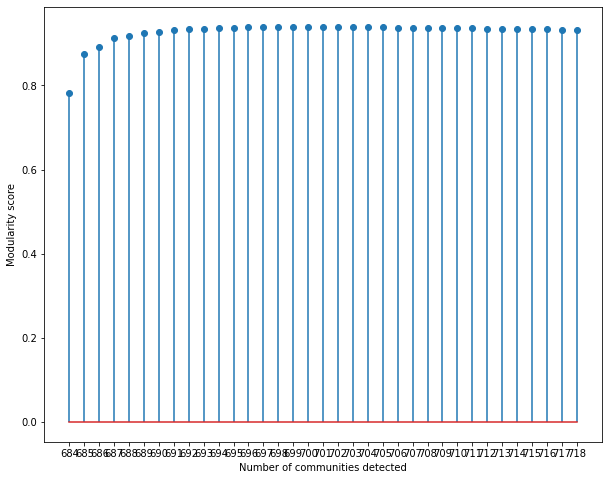

In [254]:
# use the modularity index to appreciate the quality of alternative
# paritioning solutions
# fit
from networkx.algorithms.community import girvan_newman, modularity
import itertools
solutions = girvan_newman(G_tf)
# get all segmentations for the network
k = 35
# register modularity scores
modularity_scores = dict()
comm = []
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    comm.append(solution)
    score = modularity(G_tf, solution)
    modularity_scores[len(solution)] = score
# print(comm)
# plot modularity data
fig = plt.figure(figsize=(10,8))
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()

In [270]:
# investigate the network evolution over time
df_tf_time = df_issue[df_issue.Projects=="tensorflow"].select(['Closed_by','User.Username','State.Created_at']).toPandas()

In [269]:
df_torch_time = df_issue[df_issue.Projects=="pytorch"].select(['Closed_by','User.Username','State.Created_at']).toPandas()

In [271]:
# segment data into different datasets based on time interval
df_tf_time['Created_at'] = pd.to_datetime(df_tf_time['Created_at'])
df_torch_time['Created_at'] = pd.to_datetime(df_torch_time['Created_at'])

In [272]:
# sort data by time
df_torch_time = df_torch_time.sort_values(by='Created_at')

In [384]:
# segment dataset by time
df_torch_time_2016 = df_torch_time[df_torch_time['Created_at']<'2017-01-01']
df_torch_time_2018 = df_torch_time[df_torch_time['Created_at']>='2018-01-01']
df_temp = df_torch_time[df_torch_time['Created_at']<'2018-01-01']
df_torch_time_2017 = df_temp[df_temp['Created_at']>='2017-01-01']

In [385]:
# drop na values
df_torch_time_2016 = df_torch_time_2016.dropna()
df_torch_time_2017 = df_torch_time_2017.dropna()
df_torch_time_2018 = df_torch_time_2018.dropna()

In [386]:
# find if closed_by in 2017 is the same as in 2016
show = []
for i in range(len(df_torch_time_2017)):
    if df_torch_time_2017.iloc[i]['Closed_by'] in df_torch_time_2016['Closed_by'].values and df_torch_time_2017.iloc[i]['Username'] not in df_torch_time_2016['Username'].values:
        show.append(1)
    elif df_torch_time_2017.iloc[i]['Username'] in df_torch_time_2016['Username'].values and df_torch_time_2017.iloc[i]['Closed_by'] not in df_torch_time_2016['Closed_by'].values:
        show.append(2)
    elif df_torch_time_2017.iloc[i]['Closed_by'] in df_torch_time_2016['Closed_by'].values and df_torch_time_2017.iloc[i]['Username'] in df_torch_time_2016['Username'].values:
        show.append(3)
    else:
        show.append(0)

In [387]:
df_torch_time_2017['show'] = show

In [388]:
# find if closed_by in 2018 is the same as in 2017
show = []
for i in range(len(df_torch_time_2018)):
    if df_torch_time_2018.iloc[i]['Closed_by'] in df_torch_time_2017['Closed_by'].values and df_torch_time_2018.iloc[i]['Username'] not in df_torch_time_2017['Username'].values:
        show.append(1)
    elif df_torch_time_2018.iloc[i]['Username'] in df_torch_time_2017['Username'].values and df_torch_time_2018.iloc[i]['Closed_by'] not in df_torch_time_2017['Closed_by'].values:
        show.append(2)
    elif df_torch_time_2018.iloc[i]['Closed_by'] in df_torch_time_2017['Closed_by'].values and df_torch_time_2018.iloc[i]['Username'] in df_torch_time_2017['Username'].values:
        show.append(3)
    else:
        show.append(0)

In [389]:
df_torch_time_2018['show'] = show

In [311]:
def color_node(node):
    if node in df_torch_time_2016['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

{'Soumith Chintala': Text(0.3976768377189926, -0.7181462588309815, 'Soumith Chintala'),
 'Sergey Zagoruyko': Text(0.23621405416453303, 0.8778648127601038, 'Sergey Zagoruyko'),
 'Adam Paszke': Text(-0.986588296170508, 0.2454222432548685, 'Adam Paszke'),
 'bartvm': Text(0.3488948382673104, -0.9258473028331843, 'bartvm'),
 'soumith': Text(0.5351313457166583, -0.5669051753083497, 'soumith'),
 'szagoruyko': Text(0.36869601703490074, 1.0, 'szagoruyko'),
 'glample': Text(-0.9000247967318873, 0.08761168095754313, 'glample')}

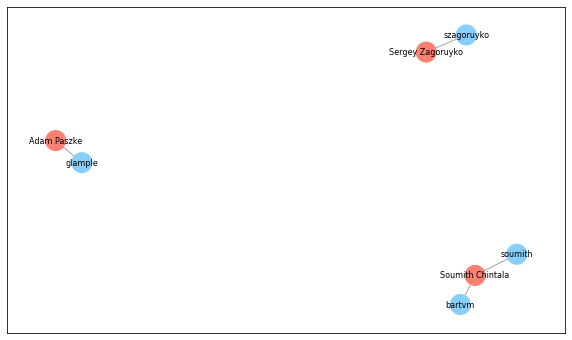

In [315]:
# plot network evolution
plt.figure(figsize=(10,6))
G_torch_2016 = nx.Graph()
G_torch_2016.add_nodes_from(df_torch_time_2016["Closed_by"])
G_torch_2016.add_nodes_from(df_torch_time_2016["Username"])
G_torch_2016.add_edges_from(zip(df_torch_time_2016["Closed_by"], df_torch_time_2016["Username"]))
color = [color_node(node) for node in G_torch_2016.nodes]
pos = nx.spring_layout(G_torch_2016)
nc = nx.draw_networkx_nodes(G_torch_2016,
node_color=color,
pos = pos,
node_size=400, #nodesize based on degree
alpha=1,
label = True
)
nx.draw_networkx_edges(G_torch_2016,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_torch_2016, pos = pos, labels ={n: n for n in G_torch_2016}, font_size=8)

In [398]:
def color_node(node):
    if node in df_torch_time_2017['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

In [399]:
# set outline color for nodes based on show
def outline(node):
    for i in range(len(df_torch_time_2017)):
        if node == df_torch_time_2017.iloc[i]['Closed_by'] or node == df_torch_time_2017.iloc[i]['Username']:
            if df_torch_time_2017.iloc[i]['show'] == 1:
                return 'indigo'
            elif df_torch_time_2017.iloc[i]['show'] == 2:
                return 'orange'
            elif df_torch_time_2017.iloc[i]['show'] == 3:
                return 'black'
            else:  
                return 'green'

{'Alessandro Suglia': Text(-0.9952436209817599, 0.31015942927749585, 'Alessandro Suglia'),
 'Soumith Chintala': Text(-0.016956770465795606, 0.5589280043383863, 'Soumith Chintala'),
 'Adam Paszke': Text(-0.3778026367410926, -0.5013724786821673, 'Adam Paszke'),
 'Joel Schlosser': Text(-0.4417546446622565, -0.8824113600042394, 'Joel Schlosser'),
 'Mike Ruberry': Text(0.21694618008528402, 0.2484512388506053, 'Mike Ruberry'),
 'Facebook Community Bot': Text(0.6317720764619972, -0.4976619433189132, 'Facebook Community Bot'),
 'Dustin Franklin': Text(0.3004163740379913, -0.9427943395085197, 'Dustin Franklin'),
 'Michael Gump': Text(0.6969140784378904, 0.30665638378079685, 'Michael Gump'),
 'Francisco Massa': Text(0.9281998834616185, 0.5616377702127303, 'Francisco Massa'),
 'Anuvabh Dutt': Text(-0.6018815876639375, 0.6604293871869383, 'Anuvabh Dutt'),
 'Edward Z. Yang': Text(0.0483342304690227, -0.9088952566927546, 'Edward Z. Yang'),
 'Natalia Gimelshein': Text(-0.07234803457448925, 0.78858785

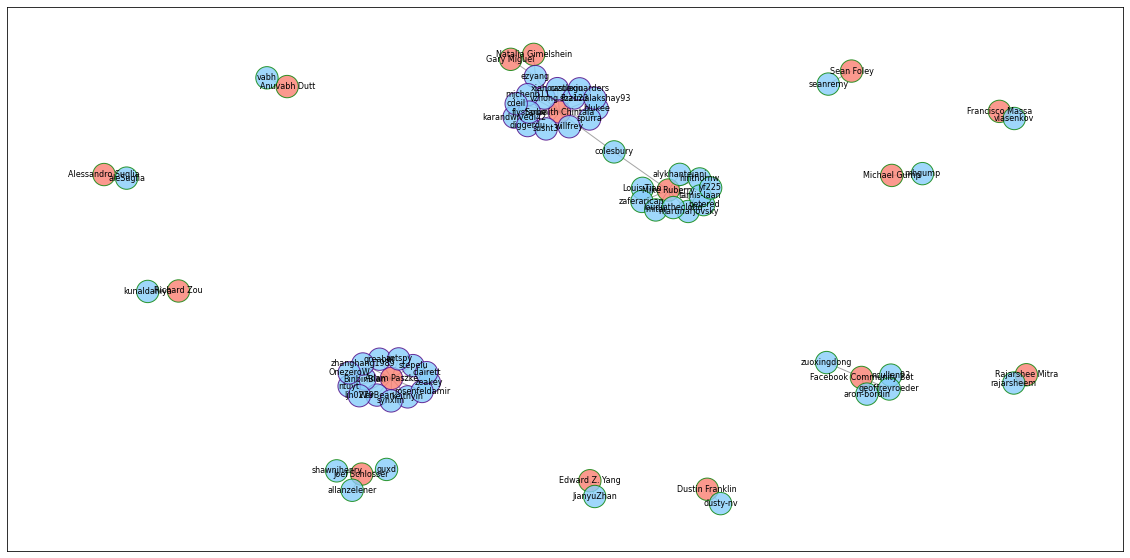

In [400]:
# plot network evolution
plt.figure(figsize=(20,10))
G_torch_2017 = nx.Graph()
G_torch_2017.add_nodes_from(df_torch_time_2017["Closed_by"])
G_torch_2017.add_nodes_from(df_torch_time_2017["Username"])
G_torch_2017.add_edges_from(zip(df_torch_time_2017["Closed_by"], df_torch_time_2017["Username"]))
color = [color_node(node) for node in G_torch_2017.nodes]
outline_color = [outline(node) for node in G_torch_2017.nodes]
# set edge color based on show
pos = nx.spring_layout(G_torch_2017)
nc = nx.draw_networkx_nodes(G_torch_2017,
node_color=color,
edgecolors=outline_color,
pos = pos,
node_size=500, #nodesize based on degree
alpha=0.8,
label = True
)
nx.draw_networkx_edges(G_torch_2017,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_torch_2017, pos = pos, labels ={n: n for n in G_torch_2017}, font_size=8)

In [394]:
def color_node(node):
    if node in df_torch_time_2018['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

# set outline color for nodes based on show
def outline(node):
    for i in range(len(df_torch_time_2018)):
        if node == df_torch_time_2018.iloc[i]['Closed_by'] or node == df_torch_time_2018.iloc[i]['Username']:
            if df_torch_time_2018.iloc[i]['show'] == 1:
                return 'indigo'
            elif df_torch_time_2018.iloc[i]['show'] == 2:
                return 'orange'
            elif df_torch_time_2018.iloc[i]['show'] == 3:
                return 'black'
            else:  
                return 'green'

{'Sam Gross': Text(0.9123134097292491, -0.4581163885801291, 'Sam Gross'),
 'Adam Paszke': Text(-0.00044722866867570507, 0.5615244921786029, 'Adam Paszke'),
 'Edward Z. Yang': Text(0.04736055244093993, -0.3652610475581871, 'Edward Z. Yang'),
 'TuranTimur ': Text(0.25348899326963714, -0.8570714380553688, 'TuranTimur '),
 'Facebook Community Bot': Text(-0.509255256235817, 0.5137818045633629, 'Facebook Community Bot'),
 'Ivan Yashchuk': Text(0.0028451338091134925, -0.8301827353062122, 'Ivan Yashchuk'),
 'Ralf Gommers': Text(0.48902594265969695, -0.7548131142584251, 'Ralf Gommers'),
 'Mike Ruberry': Text(0.0539441285980626, 0.2855829496894217, 'Mike Ruberry'),
 'Dingquan': Text(0.8503533247533885, -0.19427718565921334, 'Dingquan'),
 'Gary Miguel': Text(-0.8286073199690913, -0.12654751732011896, 'Gary Miguel'),
 'Soumith Chintala': Text(-0.10272546000625743, -0.4059516181464678, 'Soumith Chintala'),
 'Kenta Kubo': Text(0.6546361908083964, 0.6733138828649551, 'Kenta Kubo'),
 'Angus Turner': T

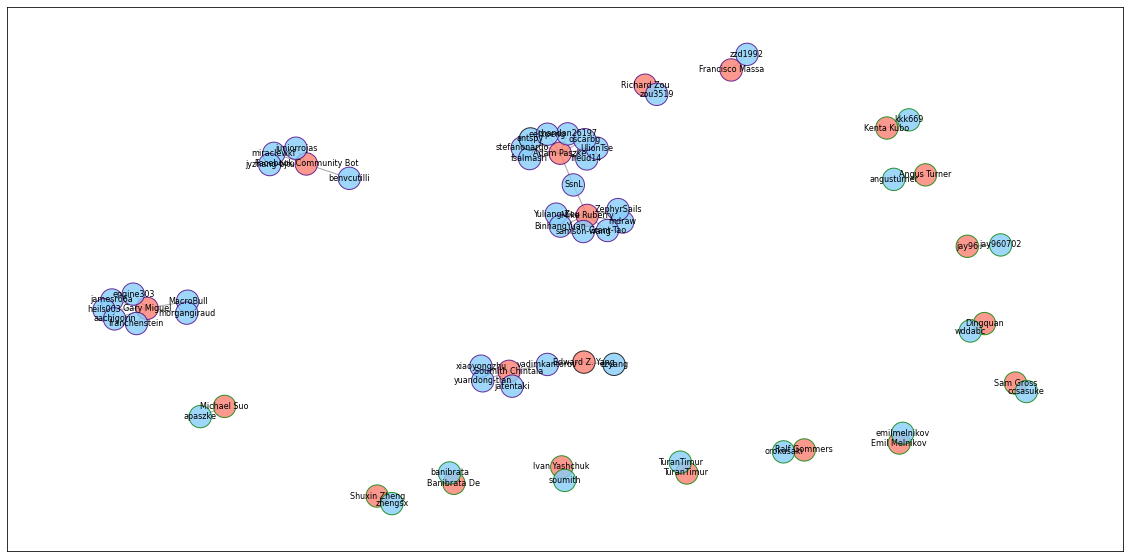

In [397]:
# plot network evolution
plt.figure(figsize=(20,10))
G_torch_2018 = nx.Graph()
G_torch_2018.add_nodes_from(df_torch_time_2018["Closed_by"])
G_torch_2018.add_nodes_from(df_torch_time_2018["Username"])
G_torch_2018.add_edges_from(zip(df_torch_time_2018["Closed_by"], df_torch_time_2018["Username"]))
color = [color_node(node) for node in G_torch_2018.nodes]
outline_color = [outline(node) for node in G_torch_2018.nodes]
# set edge color based on show
pos = nx.spring_layout(G_torch_2018)
nc = nx.draw_networkx_nodes(G_torch_2018,
node_color=color,
edgecolors=outline_color,
pos = pos,
node_size=500, #nodesize based on degree
alpha=0.8,
label = True
)
nx.draw_networkx_edges(G_torch_2018,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_torch_2018, pos = pos, labels ={n: n for n in G_torch_2018}, font_size=8)

In [401]:
# sort data by time
df_tf_time = df_tf_time.sort_values(by='Created_at')

In [403]:
df_tf_time

Closed_by          Username          Created_at
5374                None         ChrisChaw 2020-07-25 19:52:44
5391                None      rani-pinchuk 2020-07-26 07:29:49
5377    François Chollet           lgeiger 2020-07-26 11:53:48
5368                None       amirekhlasi 2020-07-26 13:33:25
5382  Alfred Sorten Wolf         loveppdog 2020-07-27 04:16:33
...                  ...               ...                 ...
2577                None        JimEverest 2021-12-29 13:20:36
1154                None       popkristina 2021-12-29 15:53:05
870                 None         Chaudry24 2021-12-29 16:23:02
2271   Rangsiman Ketkaew  rangsimanketkaew 2021-12-29 18:10:51
1427                None            Aujkst 2021-12-31 11:33:01

[5393 rows x 3 columns]

In [404]:
# segment dataset by time
df_tf_time_2020 = df_tf_time[df_tf_time['Created_at']<'2021-01-01']
df_tf_time_2021 = df_tf_time[df_tf_time['Created_at']>='2021-01-01']

In [405]:
# drop na values
df_tf_time_2020 = df_tf_time_2020.dropna()
df_tf_time_2021 = df_tf_time_2021.dropna()

In [406]:
# find if closed_by in 2017 is the same as in 2016
show = []
for i in range(len(df_tf_time_2021)):
    if df_tf_time_2021.iloc[i]['Closed_by'] in df_tf_time_2020['Closed_by'].values and df_tf_time_2021.iloc[i]['Username'] not in df_tf_time_2020['Username'].values:
        show.append(1)
    elif df_tf_time_2021.iloc[i]['Username'] in df_tf_time_2020['Username'].values and df_tf_time_2021.iloc[i]['Closed_by'] not in df_tf_time_2020['Closed_by'].values:
        show.append(2)
    elif df_tf_time_2021.iloc[i]['Closed_by'] in df_tf_time_2020['Closed_by'].values and df_tf_time_2021.iloc[i]['Username'] in df_tf_time_2020['Username'].values:
        show.append(3)
    else:
        show.append(0)

In [407]:
df_tf_time_2021['show']=show

{'François Chollet': Text(0.0777936704629392, 0.13263180980221415, 'François Chollet'),
 'Alfred Sorten Wolf': Text(0.43464743251149873, -0.3731880884403933, 'Alfred Sorten Wolf'),
 'Mark Daoust': Text(-0.5256078807869339, 0.08439700105561321, 'Mark Daoust'),
 'Cengguang Zhang': Text(0.755641605304731, 0.00251102343535759, 'Cengguang Zhang'),
 'Ben Barsdell': Text(-0.6734022337460779, 0.7250279914060007, 'Ben Barsdell'),
 'Alexander Grund': Text(0.016137778698718568, -0.15831920819675505, 'Alexander Grund'),
 'Jordy Van Landeghem': Text(0.8641937520314799, 0.03769565662930789, 'Jordy Van Landeghem'),
 'Elisei Shafer': Text(0.14627741872283725, -0.9550233474893416, 'Elisei Shafer'),
 'Nikita Namjoshi': Text(-0.017458717087102088, -0.22477294817004356, 'Nikita Namjoshi'),
 'Mihai Maruseac': Text(0.2178243435224087, 0.32263209034078416, 'Mihai Maruseac'),
 'Yasir Modak': Text(0.03058285361237485, -0.023603530743983303, 'Yasir Modak'),
 'Yong Tang': Text(-0.38747954730618095, -0.2561818786

/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20581 (\N{CJK UNIFIED IDEOGRAPH-

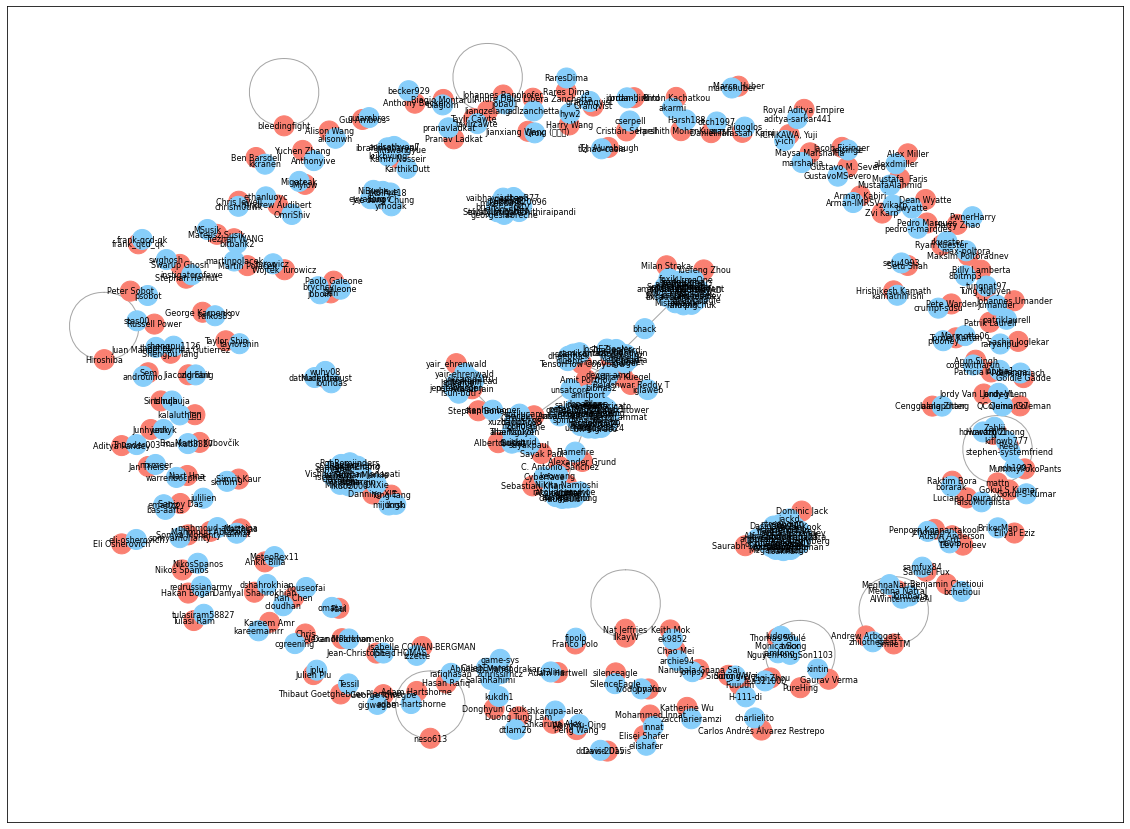

In [409]:
def color_node(node):
    if node in df_tf_time_2020['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

# plot network evolution
plt.figure(figsize=(20,15))
G_tf_2020 = nx.Graph()
G_tf_2020.add_nodes_from(df_tf_time_2020["Closed_by"])
G_tf_2020.add_nodes_from(df_tf_time_2020["Username"])
G_tf_2020.add_edges_from(zip(df_tf_time_2020["Closed_by"], df_tf_time_2020["Username"]))
color = [color_node(node) for node in G_tf_2020.nodes]
pos = nx.spring_layout(G_tf_2020)
nc = nx.draw_networkx_nodes(G_tf_2020,
node_color=color,
pos = pos,
node_size=400, #nodesize based on degree
alpha=1,
label = True
)
nx.draw_networkx_edges(G_tf_2020,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_tf_2020, pos = pos, labels ={n: n for n in G_tf_2020}, font_size=8)

In [410]:
def color_node(node):
    if node in df_tf_time_2021['Closed_by'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

# set outline color for nodes based on show
def outline(node):
    for i in range(len(df_tf_time_2021)):
        if node == df_tf_time_2021.iloc[i]['Closed_by'] or node == df_tf_time_2021.iloc[i]['Username']:
            if df_tf_time_2021.iloc[i]['show'] == 1:
                return 'indigo'
            elif df_tf_time_2021.iloc[i]['show'] == 2:
                return 'orange'
            elif df_tf_time_2021.iloc[i]['show'] == 3:
                return 'black'
            else:  
                return 'green'

{'Karim Nosseir': Text(-0.1747426837682724, 0.08727533370256424, 'Karim Nosseir'),
 'SeongJu Lee': Text(-0.6873704791069031, 0.18183550238609314, 'SeongJu Lee'),
 'Mihai Maruseac': Text(-0.01905062422156334, 0.14522093534469604, 'Mihai Maruseac'),
 'GaetanoArmenise': Text(-0.07562944293022156, 0.20524942874908447, 'GaetanoArmenise'),
 'François Chollet': Text(-0.11225525289773941, -0.1771145910024643, 'François Chollet'),
 'KumaTea': Text(-0.9213125705718994, 0.29785388708114624, 'KumaTea'),
 'Debaleen Das Spandan': Text(-0.010122830979526043, 0.9090943932533264, 'Debaleen Das Spandan'),
 'H4MST3R': Text(0.7024130821228027, 0.45053982734680176, 'H4MST3R'),
 'Thai Nguyen': Text(0.190709188580513, -0.04574330523610115, 'Thai Nguyen'),
 'Dmitry Manoshin': Text(-0.5839200615882874, -0.6670599579811096, 'Dmitry Manoshin'),
 'Tim Ogden': Text(0.5886676907539368, -0.49081453680992126, 'Tim Ogden'),
 'Vignesh Kothapalli': Text(0.06994640827178955, 0.04437771812081337, 'Vignesh Kothapalli'),
 '

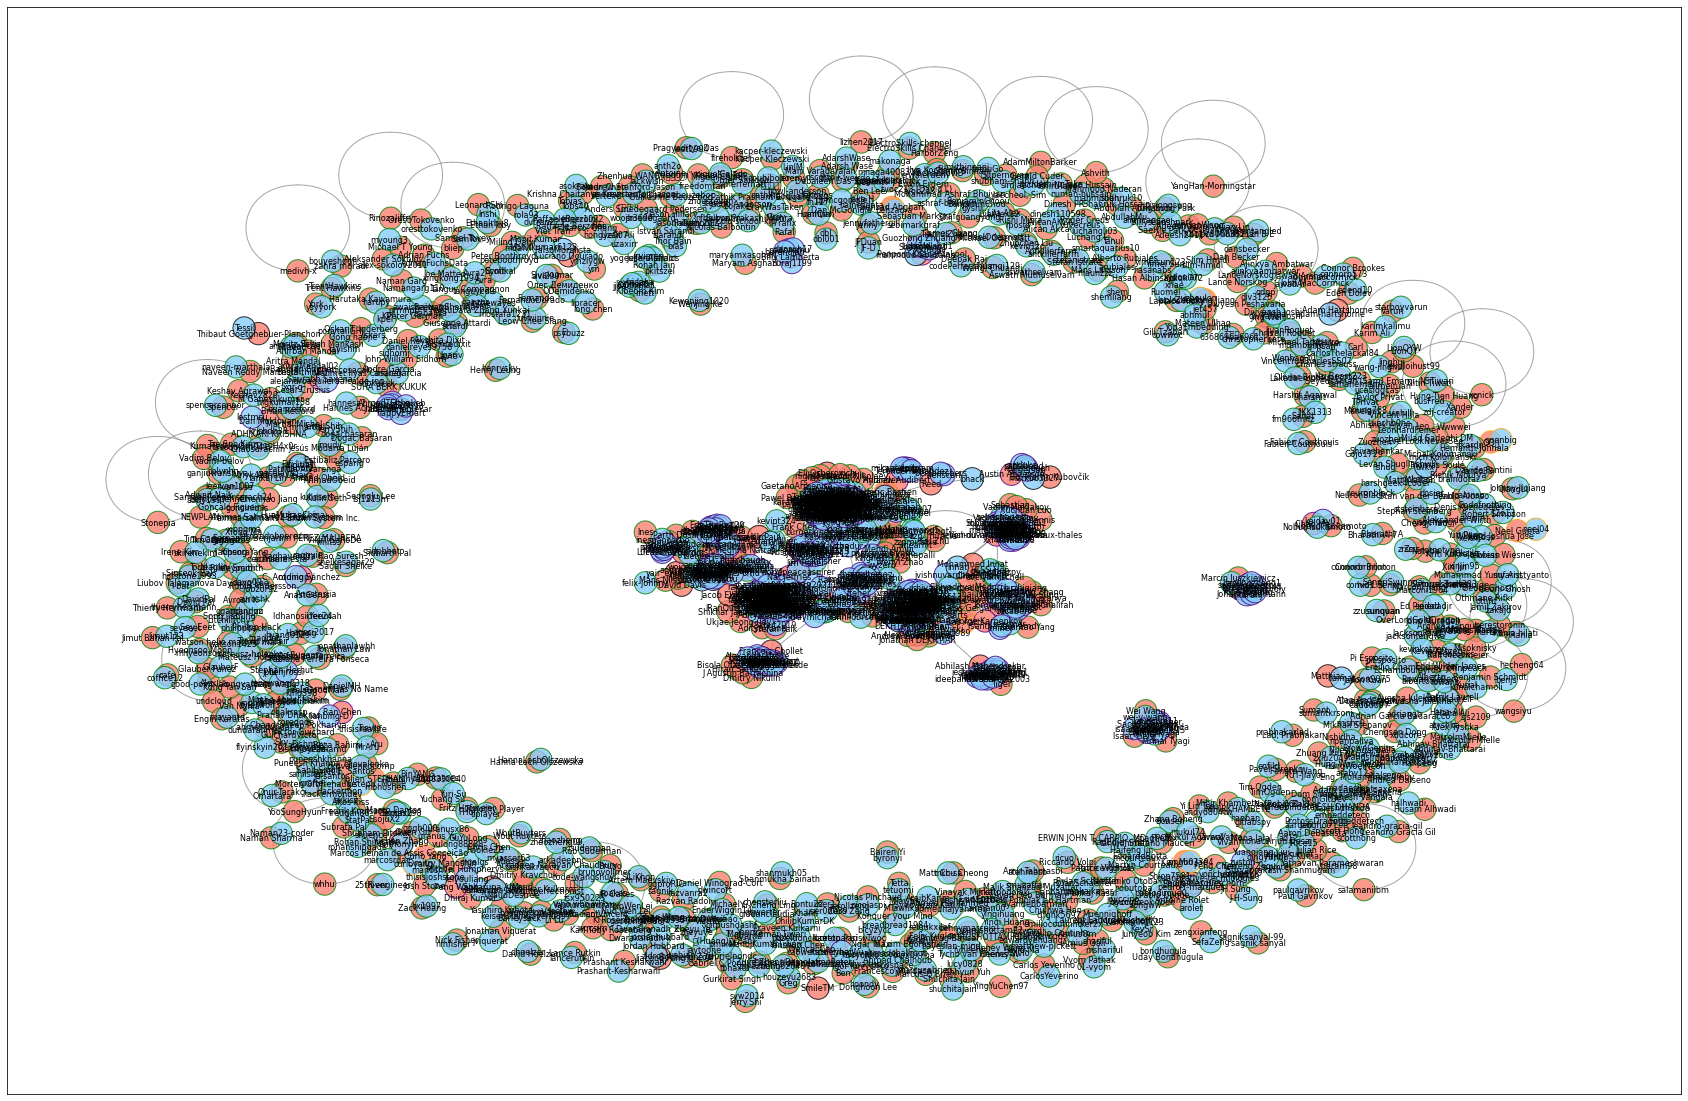

In [412]:
# plot network evolution
plt.figure(figsize=(30,20))
G_tf_2021 = nx.Graph()
G_tf_2021.add_nodes_from(df_tf_time_2021["Closed_by"])
G_tf_2021.add_nodes_from(df_tf_time_2021["Username"])
G_tf_2021.add_edges_from(zip(df_tf_time_2021["Closed_by"], df_tf_time_2021["Username"]))
color = [color_node(node) for node in G_tf_2021.nodes]
outline_color = [outline(node) for node in G_tf_2021.nodes]
# set edge color based on show
pos = nx.spring_layout(G_tf_2021)
nc = nx.draw_networkx_nodes(G_tf_2021,
node_color=color,
edgecolors=outline_color,
pos = pos,
node_size=500, #nodesize based on degree
alpha=0.8,
label = True
)
nx.draw_networkx_edges(G_tf_2021,
pos = pos,
edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G_tf_2021, pos = pos, labels ={n: n for n in G_tf_2021}, font_size=8)

### 3.2 gitData dataset

In [12]:
import findspark
findspark.init()
findspark.add_packages(r"org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")

In [13]:
### connect to spark
from pyspark.sql import SparkSession
# Session with Mongo
spark_mongo = SparkSession \
    .builder \
    .appName("gitData") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/github.gitData") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/github.gitData") \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.1') \
    .getOrCreate()

22/07/21 17:06:17 WARN Utils: Your hostname, ashubuntu resolves to a loopback address: 127.0.1.1; using 10.210.38.115 instead (on interface wlp2s0)
22/07/21 17:06:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /home/ash/.ivy2/cache
The jars for the packages stored in: /home/ash/.ivy2/jars
:: loading settings :: url = jar:file:/home/ash/miniconda3/envs/dms/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-606a117b-ffdd-45ad-8362-a2008f5c3964;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 214ms :: artifacts dl 6ms
	:: modules in us

In [14]:
# load data from MongoDB
df_gitdata = spark_mongo.read.format("mongo").load()

df_gitdata.printSchema()

22/07/21 17:06:34 WARN MongoInferSchema: Field 'Diff' contains conflicting types converting to StringType
22/07/21 17:06:34 WARN MongoInferSchema: Field 'Diff_parsed' contains conflicting types converting to StringType
22/07/21 17:06:34 WARN MongoInferSchema: Field 'new_path' contains conflicting types converting to StringType
22/07/21 17:06:34 WARN MongoInferSchema: Field 'old_path' contains conflicting types converting to StringType
22/07/21 17:06:34 WARN MongoInferSchema: Field 'Source_code' contains conflicting types converting to StringType
22/07/21 17:06:34 WARN MongoInferSchema: Field 'Source_code_before' contains conflicting types converting to StringType


root
 |-- Branch: struct (nullable = true)
 |    |-- Branches: string (nullable = true)
 |    |-- In_main_branch: string (nullable = true)
 |    |-- Merge: string (nullable = true)
 |    |-- Parents: string (nullable = true)
 |-- Code_change: struct (nullable = true)
 |    |-- Diff: struct (nullable = true)
 |    |    |-- Diff: string (nullable = true)
 |    |    |-- Diff_parse: struct (nullable = true)
 |    |    |    |-- Deleted_lines: integer (nullable = true)
 |    |    |    |-- Diff_parsed: string (nullable = true)
 |    |-- Path: struct (nullable = true)
 |    |    |-- new_path: string (nullable = true)
 |    |    |-- old_path: string (nullable = true)
 |    |-- Source_code: struct (nullable = true)
 |    |    |-- Source_code: string (nullable = true)
 |    |    |-- Source_code_before: string (nullable = true)
 |-- Commit: struct (nullable = true)
 |    |-- hash: string (nullable = true)
 |    |-- Msg: struct (nullable = true)
 |    |    |-- msg: string (nullable = true)
 |    | 

#### 3.2.1 word2vec

In [19]:
# word2vec
# libraries
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import Word2Vec
from pyspark.sql.functions import format_number as fmt

In [15]:
df_tf = df_gitdata[df_gitdata.Project_name.Project_type=="tensorflow"].select(['Commit.Msg.msg'])

In [16]:
df_torch = df_gitdata[df_gitdata.Project_name.Project_type=="pytorch"].select(['Commit.Msg.msg'])

In [20]:
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="msg", toLowercase=True, pattern="\\W")
df_tf=tokenizer.transform(df_tf)

In [21]:
%%time
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_tf = word2Vec.fit(df_tf)

22/07/21 17:10:03 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/07/21 17:10:03 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


CPU times: user 75.4 ms, sys: 43.8 ms, total: 119 ms
Wall time: 1min 36s


In [22]:
# let's see the vectors
model_tf.getVectors().show()

+--------------------+--------------------+
|                word|              vector|
+--------------------+--------------------+
|           390827803|[0.10110007226467...|
|  control_flow_state|[0.03425236046314...|
|       unimplemented|[1.11289155483245...|
|i9681f68b491d1733...|[-0.2424234449863...|
|            is_local|[-0.2304449379444...|
|              breaks|[-0.3103794157505...|
|           407169931|[0.27541130781173...|
|i318c6a98c1b346cf...|[0.20730680227279...|
|           410577744|[0.15431800484657...|
|               ksize|[-0.1697421669960...|
|   convertoperations|[0.32279163599014...|
|tpu_cancellation_...|[0.89709180593490...|
|            terrible|[-0.0793721824884...|
|           397108617|[-0.2211737334728...|
|           398386333|[-0.6030296087265...|
|           392556329|[-0.4171794950962...|
|              assert|[0.34742605686187...|
|                  45|[-0.1200169250369...|
|          generalize|[-0.1703916043043...|
|              plugin|[-0.466612

In [63]:
# let's inspect some synonyms
model_tf.findSynonyms("390827803", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+--------------------+----------+
|                word|similarity|
+--------------------+----------+
|           388566721|   0.80765|
|           389946802|   0.73328|
|i4ab06468629aebfc...|   0.69450|
|i45c8c237b6bc50f1...|   0.68638|
|ieae6a574bb895764...|   0.64799|
+--------------------+----------+



In [65]:
# let's inspect some synonyms
model_tf.findSynonyms("breaks", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+--------------+----------+
|          word|similarity|
+--------------+----------+
|         50875|   0.51145|
|    supporting|   0.40427|
|tf_test_passes|   0.39455|
|     387504200|   0.39129|
|           mac|   0.38425|
+--------------+----------+



In [27]:
tokenizer = RegexTokenizer(outputCol="DOC_TOKEN", inputCol="msg", toLowercase=True, pattern="\\W")
df_torch=tokenizer.transform(df_torch)

In [28]:
%%time
# parameters
word2Vec = Word2Vec(vectorSize=100, 
                    seed=123, 
                    maxIter=10, 
                    inputCol="DOC_TOKEN", 
                    outputCol="model")

# fit the model
model_torch = word2Vec.fit(df_torch)

CPU times: user 167 ms, sys: 56.8 ms, total: 224 ms
Wall time: 4min 34s


In [29]:
# let's see the vectors
model_torch.getVectors().show()

+--------------------+--------------------+
|                word|              vector|
+--------------------+--------------------+
|           d30079806|[-0.4539007842540...|
|55fdafdb6f80924d9...|[-0.0996420308947...|
|               62131|[0.54989355802536...|
|  batchlinearalgebra|[-0.3782521784305...|
|           141659819|[-0.4956342875957...|
|              breaks|[-0.0101101147010...|
|               61564|[-0.7272977828979...|
|               hirsh|[-0.2249839156866...|
|               66082|[0.35548022389411...|
|  as_strided_inverse|[0.92384320497512...|
|               68826|[0.09789247810840...|
|        buildsizebot|[-0.1472450792789...|
|            embedded|[0.08745797723531...|
|        thcallocator|[0.11532858014106...|
|                008s|[0.06241488829255...|
|               866ms|[-0.0320904068648...|
|        remotemodule|[0.08292163908481...|
|           142065835|[-0.2516797184944...|
|           clientapi|[0.13293346762657...|
|863b677bb6685452a...|[-0.095072

In [64]:
# let's inspect some synonyms
model_torch.findSynonyms("d30079806", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+---------+----------+
|     word|similarity|
+---------+----------+
|d30192029|   0.86308|
|d32734911|   0.79510|
|d29870914|   0.79441|
|d29941681|   0.78938|
|d30318404|   0.78760|
+---------+----------+



In [66]:
# let's inspect some synonyms
model_torch.findSynonyms("breaks", 5).select("word", fmt("similarity", 5).alias("similarity")).show()

+--------------------+----------+
|                word|similarity|
+--------------------+----------+
|                 lot|   0.42782|
|         programming|   0.40333|
|6286d338785c48a3e...|   0.39280|
|             publish|   0.39179|
|               63874|   0.39173|
+--------------------+----------+



#### 3.2.2 network analysis

In [32]:
# network analysis
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
df_gitdata.printSchema()

root
 |-- Branch: struct (nullable = true)
 |    |-- Branches: string (nullable = true)
 |    |-- In_main_branch: string (nullable = true)
 |    |-- Merge: string (nullable = true)
 |    |-- Parents: string (nullable = true)
 |-- Code_change: struct (nullable = true)
 |    |-- Diff: struct (nullable = true)
 |    |    |-- Diff: string (nullable = true)
 |    |    |-- Diff_parse: struct (nullable = true)
 |    |    |    |-- Deleted_lines: integer (nullable = true)
 |    |    |    |-- Diff_parsed: string (nullable = true)
 |    |-- Path: struct (nullable = true)
 |    |    |-- new_path: string (nullable = true)
 |    |    |-- old_path: string (nullable = true)
 |    |-- Source_code: struct (nullable = true)
 |    |    |-- Source_code: string (nullable = true)
 |    |    |-- Source_code_before: string (nullable = true)
 |-- Commit: struct (nullable = true)
 |    |-- hash: string (nullable = true)
 |    |-- Msg: struct (nullable = true)
 |    |    |-- msg: string (nullable = true)
 |    | 

In [35]:
# export dataframe to pandas dataframe
df = df_gitdata.select(['Commit.Committer.Committer_name','Commit.Msg.Author.Author_name','Project_name.Project_type','Commit.Committer.Committer_date']).toPandas()


In [37]:
# delete duplicates by time
df = df.drop_duplicates(subset=['Committer_date'])

In [39]:
df.head()

Committer_name      Author_name Project_type      Committer_date
0  Facebook GitHub Bot          Jane Xu      pytorch 2021-07-23 17:31:41
2  Facebook GitHub Bot  Vitaly Fedyunin      pytorch 2021-07-01 16:41:25
3  Facebook GitHub Bot          Jane Xu      pytorch 2021-07-22 23:34:41
4  Facebook GitHub Bot      Jeffrey Wan      pytorch 2021-07-07 13:21:19
5  Facebook GitHub Bot       Peter Bell      pytorch 2021-08-23 20:07:16

In [44]:
# plot the network
# color the node if node is belong to closed_by
def color_node(node):
    if node in df['Committer_name'].values:
        return 'salmon'
    else:
        return 'lightskyblue'

In [45]:
G = nx.Graph()
G.add_nodes_from(df["Committer_name"])
G.add_nodes_from(df["Author_name"])
G.add_edges_from(zip(df["Committer_name"], df["Author_name"]))

In [46]:
color = [color_node(node) for node in G.nodes]

In [50]:
# set outline color for nodes based on show
def outline(node):
    for i in range(len(df)):
        if node == df.iloc[i]['Committer_name'] or node == df.iloc[i]['Author_name']:
            if df.iloc[i]['Project_type'] == "pytorch":
                return 'indigo'
            else:  
                return 'green'

In [51]:
outline_color = [outline(node) for node in G.nodes]

/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ash/miniconda3/envs/spark/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing fr

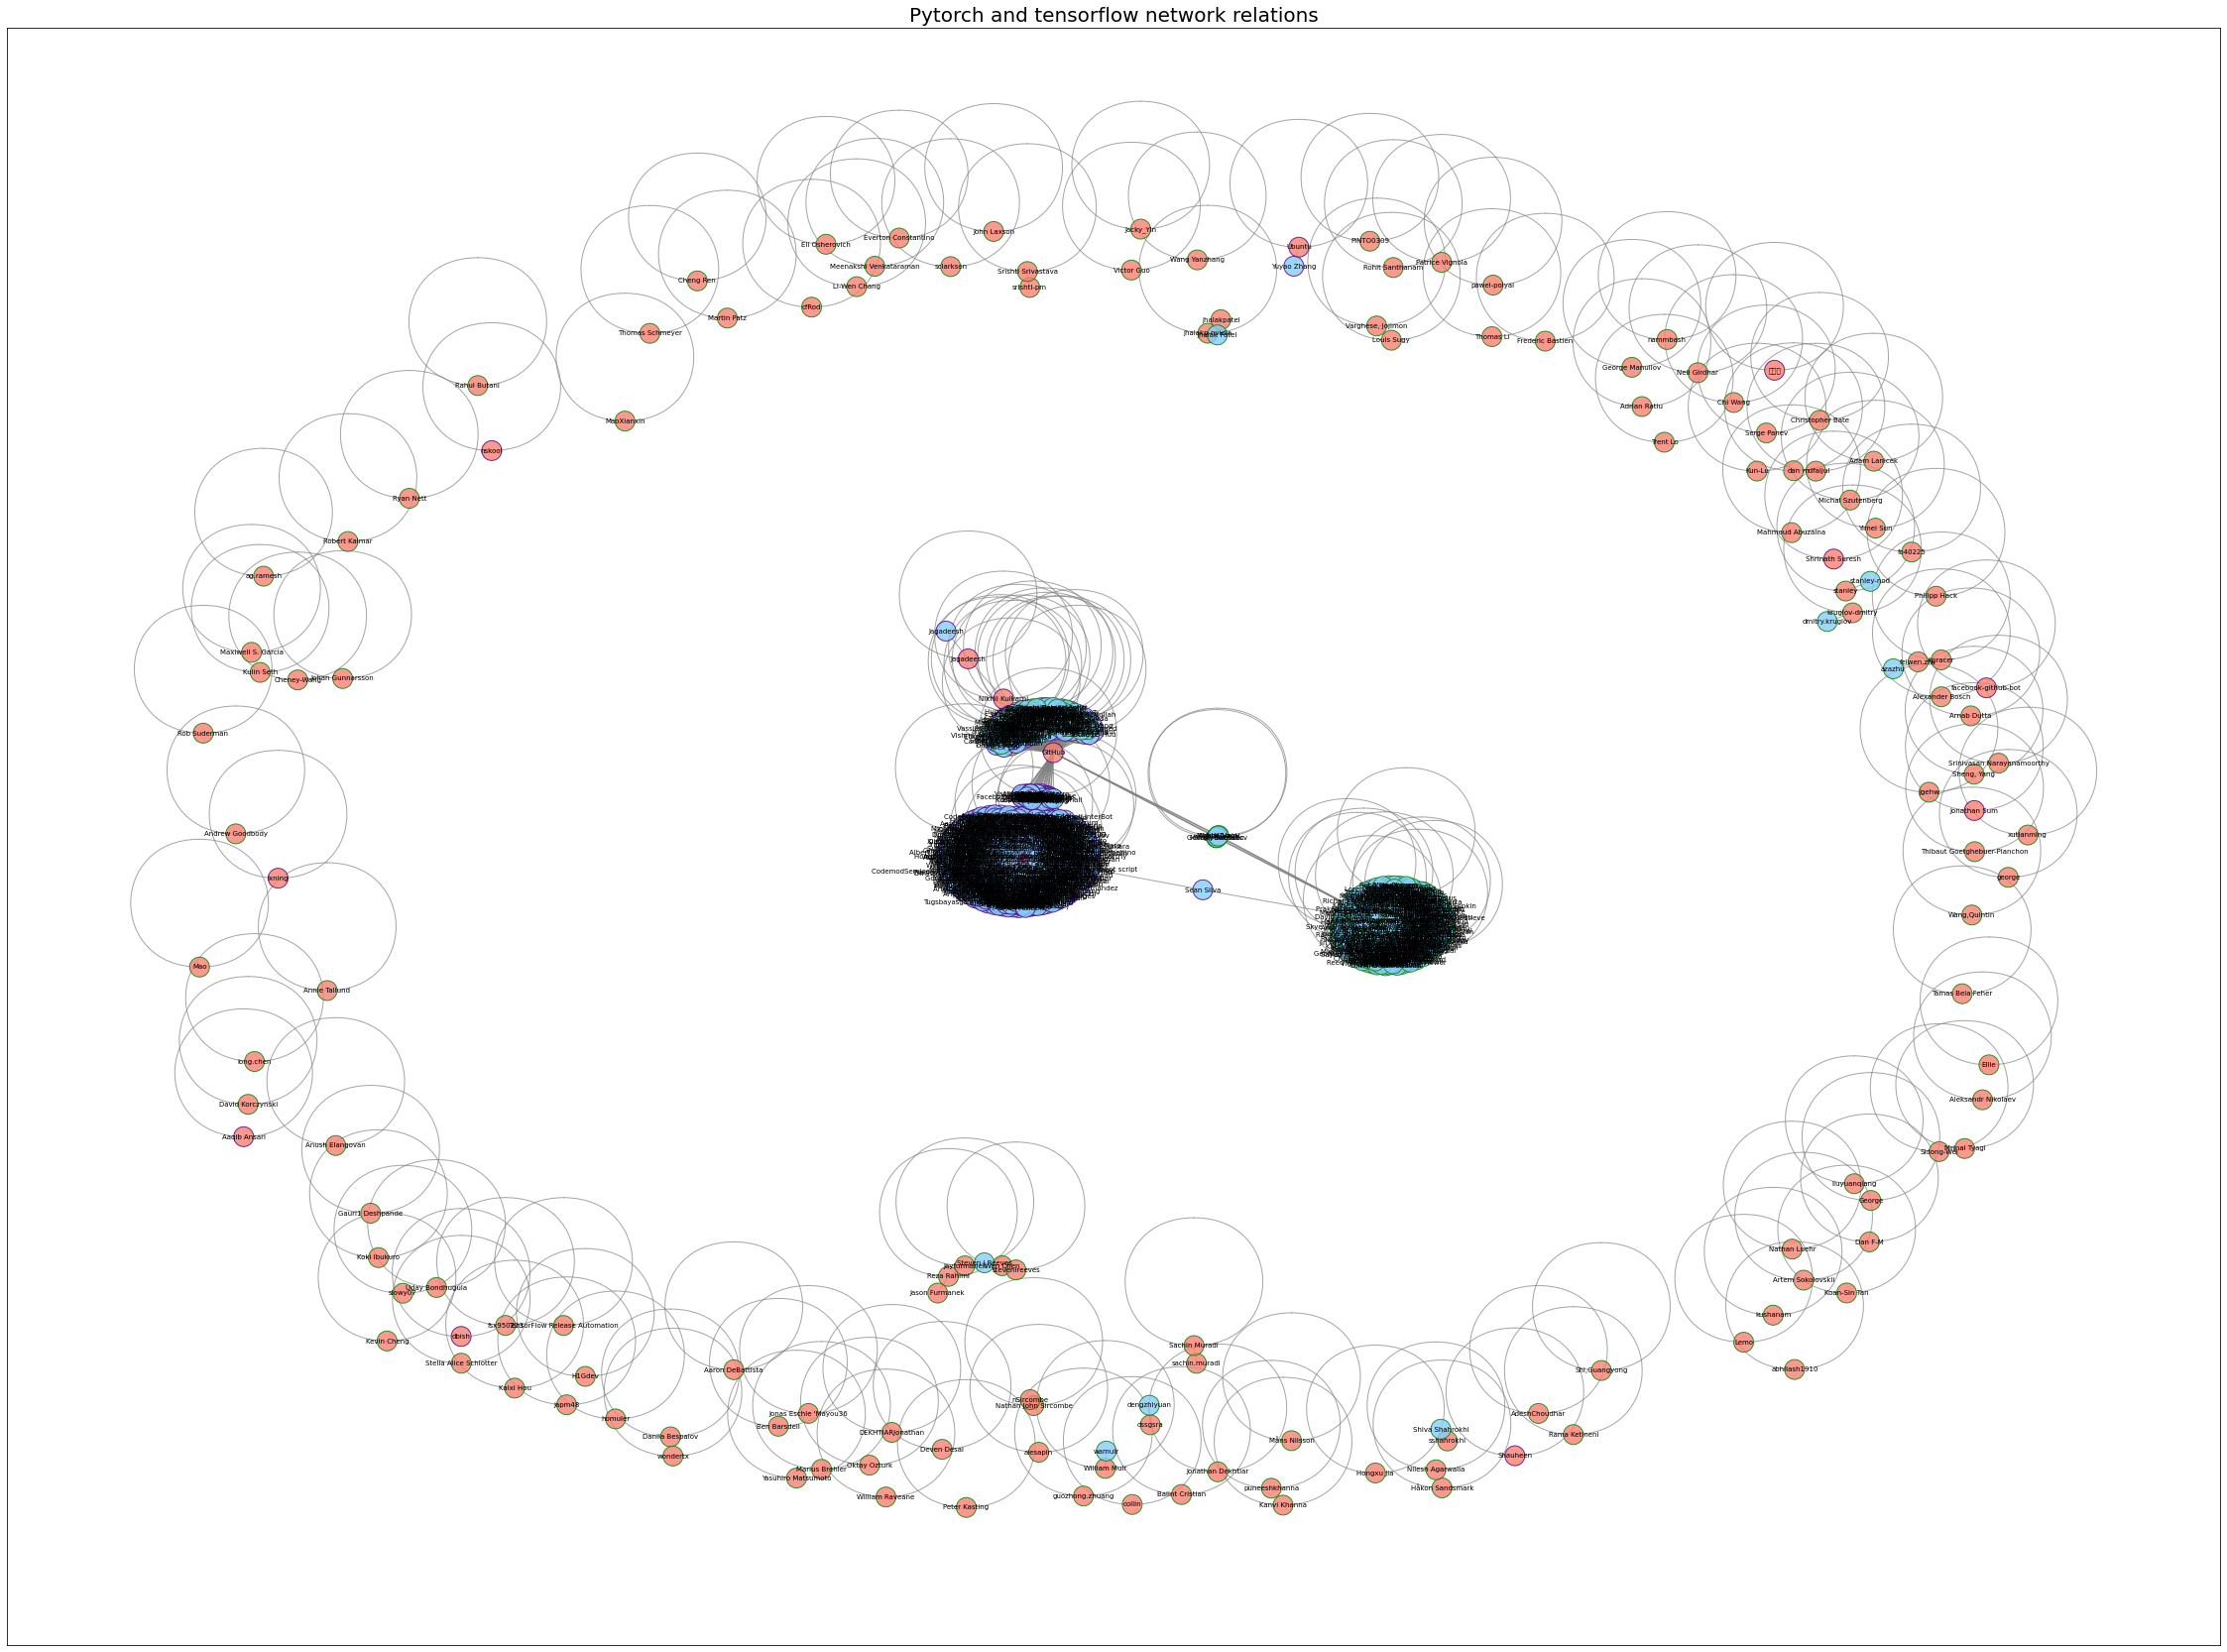

In [58]:
# plot the network
fig = plt.figure(figsize=(40, 30))

pos = nx.spring_layout(G)
nc = nx.draw_networkx_nodes(G,
node_color=color,
pos = pos,
edgecolors=outline_color,
node_size=400, #nodesize based on degree
alpha=0.8,
label = True
)
nx.draw_networkx_edges(G,
pos = pos,

edge_color='grey',
alpha=0.7)
nx.draw_networkx_labels(G, pos = pos, labels ={n: n for n in G}, font_size=7)
# add title
plt.title("Pytorch and tensorflow network relations", fontsize=20)
plt.show()

the average_degree = 2.129380053908356


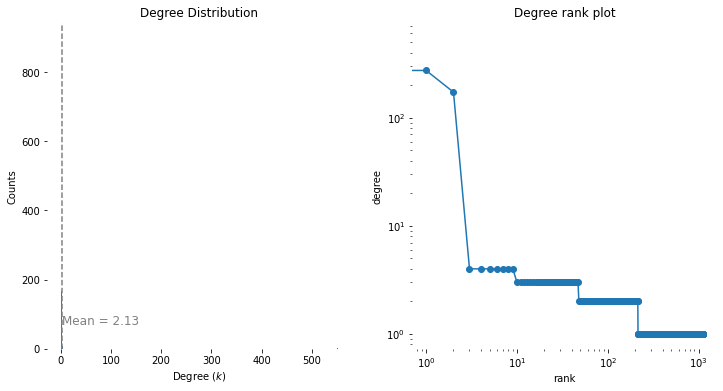

In [60]:
# %% degree distribution
from collections import Counter

l = sorted([d for k,d in G.degree()])
k = Counter(l)
average_degree=np.mean(l)
print('the average_degree =',average_degree)
#  draw the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.bar(k.keys(),[i for i in k.values()])
ax1.axvline(x=average_degree, color='grey', ls='--')
#annotate mean on the graph
ax1.annotate('Mean = 2.13', xy=(2,70),fontsize=12,color='grey')
#set spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#set labels
ax1.set_xlabel('Degree ($k$)')
ax1.set_ylabel('Counts')
#set title
ax1.set_title('Degree Distribution')

# initialize a new figure and plot the data contestually
x = sorted([d for n, d in G.degree()], reverse=True)
ax2.loglog(x, marker="o")
# axes properties
ax2.set_title("Degree rank plot")
ax2.set_ylabel("degree")
ax2.set_xlabel("rank")

# set spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
plt.show()

array([[<AxesSubplot:xlabel='degree', ylabel='degree'>,
        <AxesSubplot:xlabel='betweenness', ylabel='degree'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='degree'>],
       [<AxesSubplot:xlabel='degree', ylabel='betweenness'>,
        <AxesSubplot:xlabel='betweenness', ylabel='betweenness'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='betweenness'>],
       [<AxesSubplot:xlabel='degree', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='betweenness', ylabel='eigenvector'>,
        <AxesSubplot:xlabel='eigenvector', ylabel='eigenvector'>]],
      dtype=object)

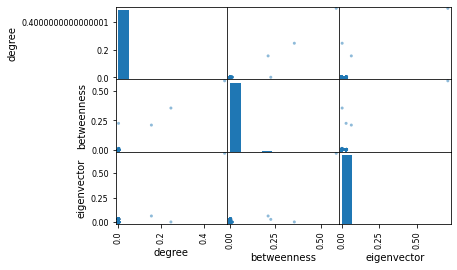

In [61]:
#compute centrality measures
import seaborn as sns
from networkx.algorithms import centrality, degree_centrality
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import eigenvector_centrality_numpy
# --> degree centrality
dg = degree_centrality(G)
# --> betweenness centrality
bc = betweenness_centrality(G)
# --> eigenvector centrality
ec = eigenvector_centrality_numpy(G)
df = pd.DataFrame({'degree':dg,'betweenness':bc,'eigenvector':ec})
pd.plotting.scatter_matrix(df)

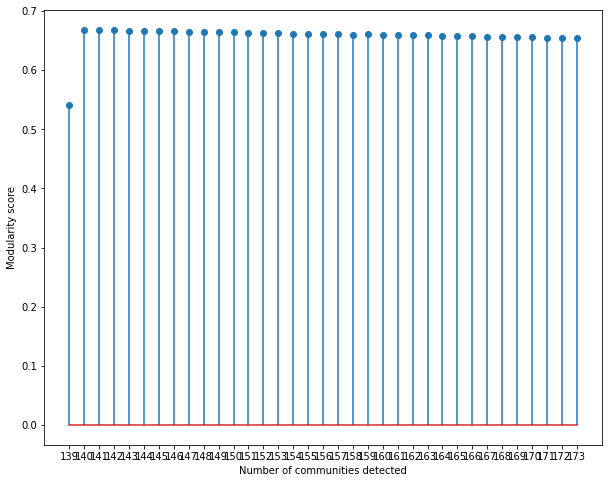

In [62]:
# %% community detection
# use the modularity index to appreciate the quality of alternative
# paritioning solutions
# fit
from networkx.algorithms.community import girvan_newman, modularity
import itertools
solutions = girvan_newman(G)
# get all segmentations for the network
k = 35
# register modularity scores
modularity_scores = dict()
comm = []
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    comm.append(solution)
    score = modularity(G, solution)
    modularity_scores[len(solution)] = score
# print(comm)
# plot modularity data
fig = plt.figure(figsize=(10,8))
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()